In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re

## Population preprocessing

In [2]:
file = "../data/population_suisse_clean.xlsx"

df_pop = pd.read_excel(file)
df_pop = df_pop.reset_index()

Remove district information

In [3]:
df_pop.drop(df_pop['index'].str.startswith(">>"), inplace=True)

Remove NPZ information and parenthesis information

In [4]:
clean_name = lambda s: s.partition(' ')[2]
remove_sup = lambda s: re.sub(r'\(*\ [^)]*\)', '', s)

df_pop['index'] = df_pop['index'].apply(clean_name)
df_pop['index'] = df_pop['index'].apply(remove_sup)

In [5]:
name2pop = {}
def create_dict(row):
    name2pop.update({row['index']: row["Etat de la population"]})

In [6]:
a = df_pop.apply(create_dict, axis=1)

--------

## Capacity preprocessing

In [7]:
file = '../data/2017-01-30_out.csv'
df_train = pd.read_csv(file)

/Users/TristanO/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Clean stop id for aggregation

In [8]:
clean_id = lambda s : s.partition(':')[0]

df_train['stop_id'] = df_train['stop_id'].apply(clean_id)

Aggregate

In [9]:
most_present = lambda x: x.value_counts().index[0]

In [10]:
df = df_train.groupby(['stop_id']).agg({'name': most_present,'id': 'count'})
df["amount_of_train"] = df.id
df = df[["amount_of_train", "name"]]
df

,amount_of_train,name
stop_id,,
8014428,130,Weil am Rhein
8014429,130,Weil am Rhein-Ost
8014439,75,Riehen
8014440,205,Lorrach-Stetten
8014441,205,Lorrach Hbf
8014443,182,Lorrach Haagen/Messe
8014444,182,Lorrach Brombach/Hauingen
8014445,182,Steinen (D)
8014446,70,Maulburg


In [11]:
def get_pop(x):
    if x in name2pop:
        return name2pop[x]
    x1 = x.split(" ")[0]
    if x1 in name2pop:
        return name2pop[x1]
    x2 = x.split("-")[0]
    if x2 in name2pop:
        return name2pop[x2]
    

In [12]:
df['pop'] = df.name.apply(get_pop)

In [71]:
df_okay = df[~df['pop'].isnull()]

In [72]:
sum(df['pop'].isnull())

283

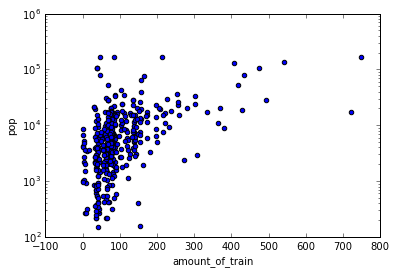

In [73]:
df_okay.plot.scatter(x='amount_of_train', y='pop', logy=True);

In [74]:
name2pop["Prilly"]

12058

In [78]:
df_okay[df_okay.amount_of_train < 3]

,amount_of_train,name,pop
stop_id,,,
8503408,1,Rekingen AG,990.0
8506011,2,Eschlikon,4228.0
8506013,2,Aadorf,8599.0
8506014,2,Elgg,4146.0
8507478,2,Frutigen,6793.0
8507495,2,Leissigen,976.0


In [15]:
df_okay

,name,id,pop
stop_id,,,
8014439,Riehen,75,20774.0
8014483,Neunkirch,36,2051.0
8014488,Trasadingen,36,603.0
8500020,Muttenz,172,17538.0
8500021,Pratteln,173,15601.0
8500023,Liestal,198,13956.0
8500024,Lausen,83,5044.0
8500025,Itingen,84,2069.0
8500026,Sissach,196,6469.0
